In [4]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_wyi0h0z.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_aBjfeNk.csv
!wget https://datahack-prod.s3.amazonaws.com/test_file/Test_LqhgPWU.csv

--2020-08-02 17:26:38--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_wyi0h0z.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.24
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23659 (23K) [text/csv]
Saving to: ‘sample_submission_wyi0h0z.csv.1’

sample_submission_w 100%[===================>]  23.10K  97.1KB/s    in 0.2s    

2020-08-02 17:26:39 (97.1 KB/s) - ‘sample_submission_wyi0h0z.csv.1’ saved [23659/23659]

--2020-08-02 17:26:45--  https://datahack-prod.s3.amazonaws.com/train_file/Train_aBjfeNk.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.124
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 425369 (415K) [text/csv]
Saving to: ‘Train_a

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
train = pd.read_csv('Train_aBjfeNk.csv')
test = pd.read_csv('Test_LqhgPWU.csv')

# oper

In [10]:
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [11]:
test.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [12]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(ID                   0
 Gender               0
 Ever_Married       140
 Age                  0
 Graduated           78
 Profession         124
 Work_Experience    829
 Spending_Score       0
 Family_Size        335
 Var_1               76
 Segmentation         0
 dtype: int64, ID                   0
 Gender               0
 Ever_Married        50
 Age                  0
 Graduated           24
 Profession          38
 Work_Experience    269
 Spending_Score       0
 Family_Size        113
 Var_1               32
 dtype: int64, (8068, 11), (2627, 10), ID                   int64
 Gender              object
 Ever_Married        object
 Age                  int64
 Graduated           object
 Profession          object
 Work_Experience    float64
 Spending_Score      object
 Family_Size        float64
 Var_1               object
 Segmentation        object
 dtype: object)

In [13]:
df=train.append(test,ignore_index=True)

In [14]:
k=['Ever_Married','Graduated']
for i in k:
  df[i]=df[i].fillna('Random')

In [15]:
i=['Profession','Work_Experience','Family_Size','Var_1']
for x in i:
  df[x]=df[x].fillna(method='bfill')

In [16]:
df.nunique()

ID                 8363
Gender                2
Ever_Married          3
Age                  67
Graduated             3
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

In [17]:
df = pd.get_dummies(df, columns=['Ever_Married','Graduated','Profession','Spending_Score','Gender','Family_Size','Var_1'])

In [18]:
train = df[df['Segmentation'].isnull()==False]
test = df[df['Segmentation'].isnull()==True]

In [19]:
del test['Segmentation']

In [ ]:
k=['Ever_Married','Graduated','Profession','Spending_Score','Gender','Var_1']
for i in k:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

# ML

In [ ]:
!pip install catboost
from math import sqrt 
from sklearn.metrics import f1_score

     |████████████████████████████████| 64.8MB 49kB/s 


In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Segmentation'] = le.fit_transform(train_df['Segmentation'])
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [ ]:
X = train_df.drop(labels=['Segmentation'], axis=1)
y = train_df['Segmentation'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:

X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((7261, 37), (7261,), (807, 37), (807,))

In [ ]:

from math import sqrt 
from sklearn.metrics import accuracy_score

In [ ]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=4,
                         random_seed=42, 
                         iterations=5000, 
                         learning_rate=0.01,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         #bagging_temperature=4, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=1000)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

0:	learn: 0.4960749	test: 0.4960749	test1: 0.4671623	best: 0.4671623 (0)	total: 6.21ms	remaining: 31s
50:	learn: 0.5199008	test: 0.5199008	test1: 0.5018587	best: 0.5117720 (27)	total: 287ms	remaining: 27.9s
100:	learn: 0.5262361	test: 0.5262361	test1: 0.5092937	best: 0.5117720 (27)	total: 566ms	remaining: 27.5s
150:	learn: 0.5260983	test: 0.5260983	test1: 0.5105328	best: 0.5117720 (27)	total: 854ms	remaining: 27.4s
200:	learn: 0.5314695	test: 0.5314695	test1: 0.5241636	best: 0.5254027 (186)	total: 1.13s	remaining: 26.9s
250:	learn: 0.5344994	test: 0.5344994	test1: 0.5254027	best: 0.5278810 (243)	total: 1.41s	remaining: 26.8s
300:	learn: 0.5387688	test: 0.5387688	test1: 0.5315985	best: 0.5315985 (297)	total: 1.69s	remaining: 26.4s
350:	learn: 0.5427627	test: 0.5427627	test1: 0.5328377	best: 0.5340768 (330)	total: 1.98s	remaining: 26.2s
400:	learn: 0.5453794	test: 0.5453794	test1: 0.5353160	best: 0.5353160 (400)	total: 2.26s	remaining: 25.9s
450:	learn: 0.5497865	test: 0.5497865	test1: 0

In [ ]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.5687732342007435


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


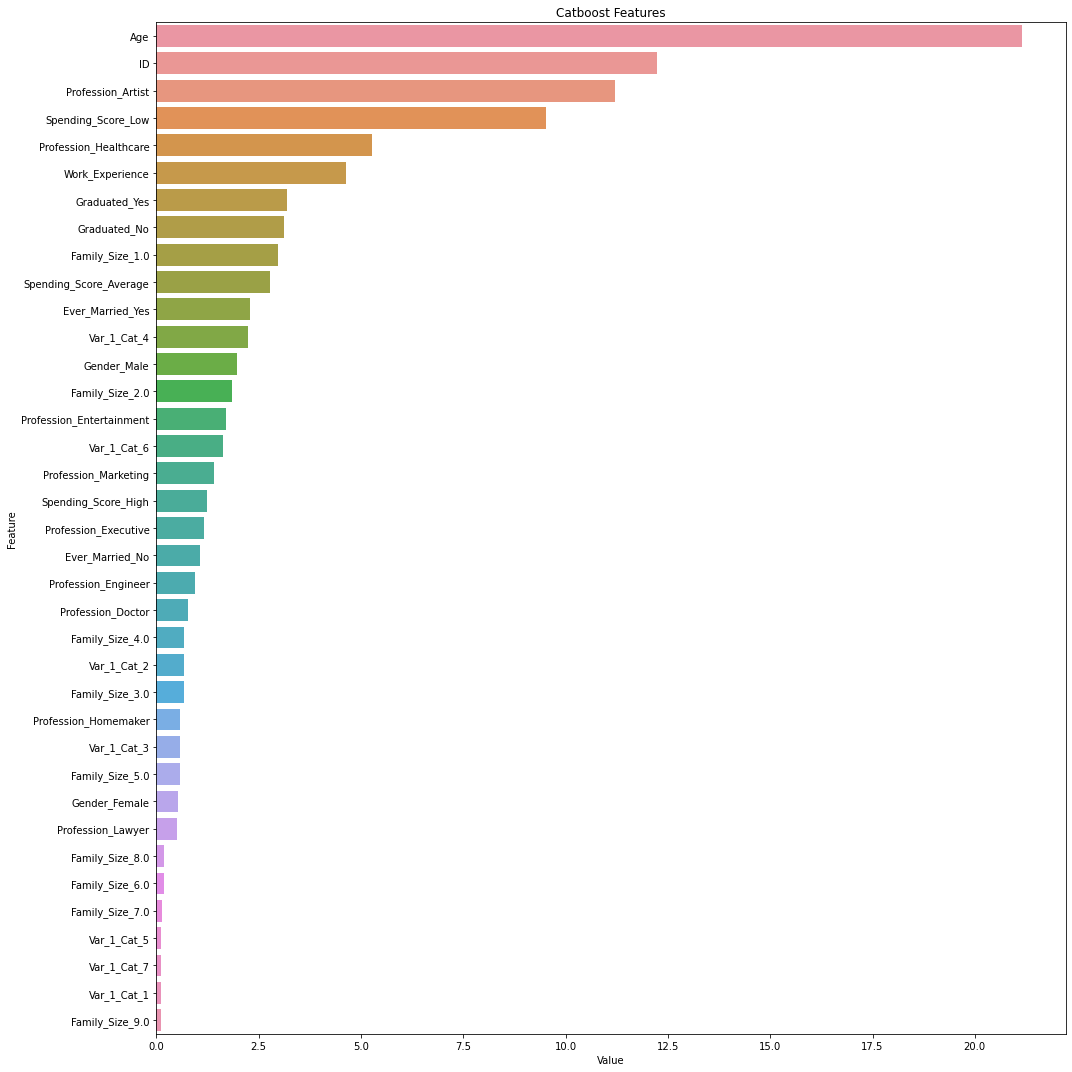

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.5563816604708798
Accuracy:  0.5415117719950434
Accuracy:  0.5675340768277571
Accuracy:  0.5377942998760843
Accuracy:  0.5439900867410161
Accuracy:  0.5848822800495663


In [ ]:
np.mean(errcat,0)

0.5550338077799404

In [ ]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[0],
       [2],
       [0],
       ...,
       [0],
       [1],
       [3]])

In [ ]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=y_pred_class, columns=['Segmentation'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
submission = pd.DataFrame({
        #"breed_category": test['ID'],
        "pet_category": df_sub['Segmentation']
    })
submission.to_csv('./av.csv', index=False)
print(submission)

     pet_category
0               A
1               C
2               A
3               B
4               D
...           ...
2622            D
2623            A
2624            A
2625            B
2626            D

[2627 rows x 1 columns]


In [ ]:
from google.colab import files
files.download('av.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DL

In [8]:
import pandas as pd
from fastai import *
from fastai.tabular import *

In [25]:
train = pd.read_csv('Train_aBjfeNk.csv')
test = pd.read_csv('Test_LqhgPWU.csv')

In [26]:
dep_var = 'Segmentation'
cat_names = ['ID','Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
cont_names = ['Age', 'Work_Experience', 'Family_Size']
procs = [FillMissing, Categorify, Normalize]

In [27]:
# Test Tabular List
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,1300)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data

TabularDataBunch;

Train: LabelList (6768 items)
x: TabularList
ID 463231; Gender Male; Ever_Married Yes; Graduated Yes; Profession Artist; Spending_Score Average; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age 0.3841; Work_Experience -0.4488; Family_Size 0.1269; ,ID 465863; Gender Male; Ever_Married No; Graduated No; Profession Healthcare; Spending_Score Low; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age -0.9877; Work_Experience 0.7785; Family_Size 0.1269; ,ID 463557; Gender Male; Ever_Married No; Graduated Yes; Profession Doctor; Spending_Score Low; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age -0.9281; Work_Experience -0.4488; Family_Size 0.1269; ,ID 467636; Gender Male; Ever_Married Yes; Graduated Yes; Profession Doctor; Spending_Score Average; Var_1 Cat_6; Work_Experience_na False; Family_Size_na False; Age 0.0859; Work_Experience -0.4488; Family_Size -0.5328; ,ID 463539; Gender Male; Ever_Married Yes; Graduated Yes; Professi

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


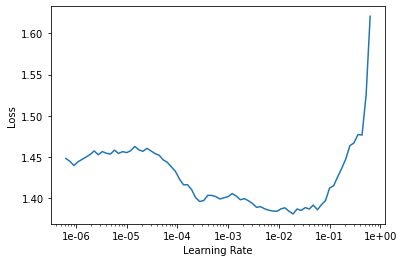

In [28]:
# Create deep learning model
learn = tabular_learner(data, layers=[100,500,300], metrics=[accuracy], emb_drop=0.4, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.243717,1.212590,0.457692,00:01
1,0.859181,1.315483,0.485385,00:01
2,0.512109,1.436069,0.450769,00:01
3,0.356314,1.372674,0.443077,00:01
4,0.315347,1.678577,0.463846,00:01
5,0.236977,1.526583,0.500000,00:01
6,0.211159,2.685166,0.490000,00:01
7,0.184731,1.462696,0.498462,00:01
8,0.134483,1.368500,0.513846,00:01
9,0.079369,1.507191,0.520000,00:01


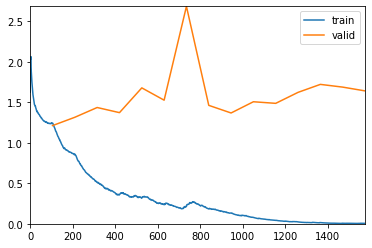

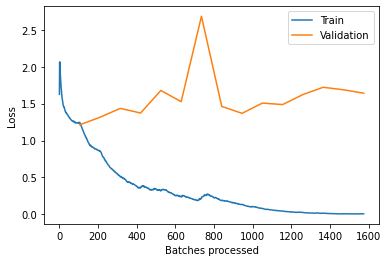

In [ ]:

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-01))

# Analyse our model
learn.model
learn.recorder.plot_losses()

In [ ]:

# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Test)

In [ ]:

seg_index = np.argmax(predictions, axis=1);seg_index

tensor([1, 2, 0,  ..., 0, 1, 3])

In [ ]:

learn.data.classes

['A', 'B', 'C', 'D']

In [ ]:
data = []
for i in seg_index:
  data.append(learn.data.classes[i])

In [ ]:
submission = pd.DataFrame(columns=['Segmentation'])
# Write submission file to score
#submission['ID'] = test['ID']
submission['Segmentation'] = data
submission.to_csv('x4.csv', header=True, index=False)

In [ ]:
submission.head(2)

,Segmentation
0,B
1,C


In [ ]:
import pandas as pd
from fastai import *
from fastai.tabular import *

In [ ]:
# Declaring dependent, Categorical and Continuous Variables
dep_var = 'Segmentation'
cat_names = ['ID','Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
cont_names = ['Age', 'Work_Experience', 'Family_Size']
procs = [FillMissing, Categorify, Normalize]

In [ ]:
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,1200)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data

In [ ]:

learn = tabular_learner(data, layers=[100, 5000, 450,350,300], metrics=accuracy, emb_drop=0.3, callback_fns=ShowGraph)

learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.255449,1.233957,0.432000,00:04
1,1.213468,1.224263,0.446000,00:04
2,1.223670,1.258152,0.434000,00:04
3,1.197141,1.276089,0.420000,00:04
4,1.204001,1.301757,0.412000,00:04
5,1.185128,1.268296,0.444000,00:04
6,1.166646,1.274291,0.446000,00:04
7,1.119718,1.303911,0.436000,00:04
8,1.075046,1.278688,0.428000,00:04
9,1.023258,1.313584,0.422000,00:04


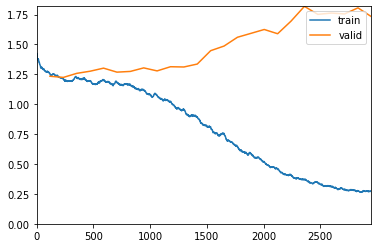

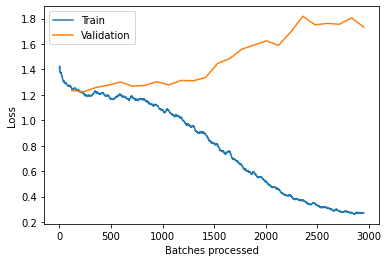

In [ ]:

learn.fit_one_cycle(25, max_lr=slice(1e-05))

learn.model
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


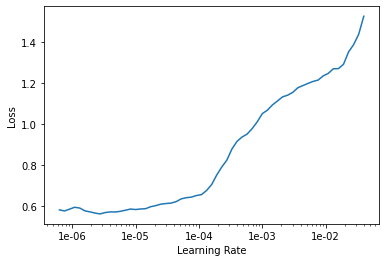

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.003254,1.956409,0.499000,00:01
1,0.002234,1.989770,0.508000,00:01
2,0.002357,2.010181,0.496000,00:01
3,0.003441,2.071291,0.494000,00:01
4,0.003119,2.039148,0.504000,00:01
5,0.002417,1.880874,0.506000,00:01
6,0.001731,1.995037,0.500000,00:01
7,0.001603,2.118554,0.503000,00:01
8,0.002526,1.986003,0.509000,00:01
9,0.002671,1.988477,0.505000,00:01


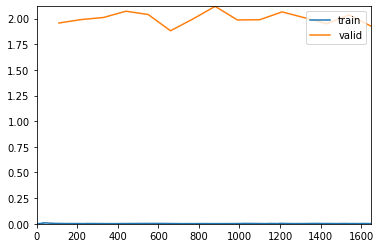

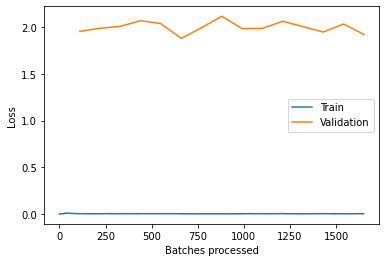

In [ ]:
learn.fit_one_cycle(15, max_lr=slice(1e-06))
learn.model
learn.recorder.plot_losses()

In [ ]:
categories=learn.data.classes
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)
a=[]
for i in labels: a.append(categories[i])
test = pd.read_csv('/content/Test_LqhgPWU.csv')
test_copy = test.copy()

submission = pd.DataFrame(columns=['ID','Segmentation'])

submission['ID'] = test_copy['ID']
submission['Segmentation'] = a
submission.to_csv('2c.csv', header=True, index=False)